# FIR Delay effect

In [33]:
import numpy as np
import scipy as sp  
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import freqz
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt


In [34]:
def load_file(file):
    fs, data = wav.read(file)
    nsamples = data.shape[0]
    Time = np.arange(nsamples) / fs

    return data, fs,Time, nsamples


def plot_waveform(data, fs, Time, nsamples):
    plt.figure(figsize=(20, 5))
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.plot(Time, data, label='Waveform')
    plt.show()

In [35]:
sr, signal = wav.read('string_1.wav')
data, fs, Time, nsamples = load_file('string_1.wav')

# Determining the Impulse Response D=1

/var/folders/ck/fpkhb7ks5q37gh4f62qz4gs40000gn/T/ipykernel_9608/97048656.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h, use_line_collection=True)


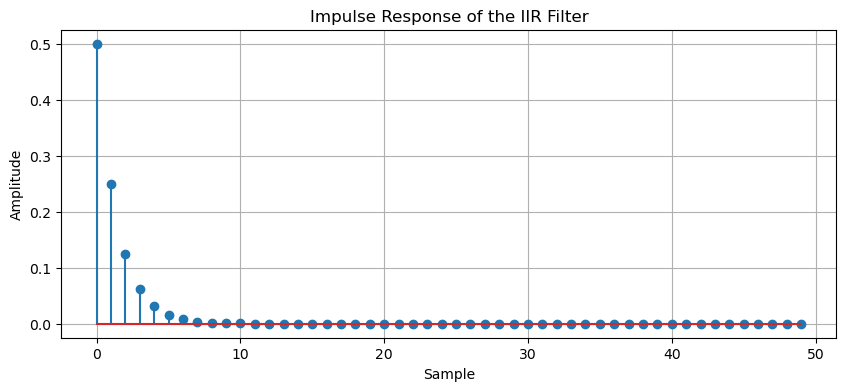

In [36]:
alpha = 0.5
beta = 0.5
D = 1  
length = 50 

delta = np.zeros(length)
delta[0] = 1  

# IIR filter
h = np.zeros_like(delta)
for t in range(length):
    h[t] = alpha * delta[t]
    if t - D >= 0:
        h[t] += beta * h[t - D]


plt.figure(figsize=(10, 4))
plt.stem(h, use_line_collection=True)
plt.title('Impulse Response of the IIR Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Frequency response of the filter

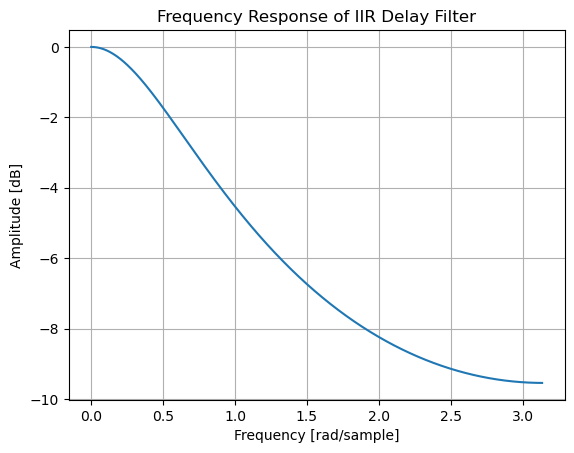

In [37]:
#finding the frequency response of the filter with freqz
b = [alpha] 
a = [1]  

b += [0] * (D - 1)  
a += [0] * (D - 1) 
a.append(-beta)  

# Compute the frequency response using freqz
w, h = freqz(b, a)

# Plot the frequency response
plt.figure()
plt.title("Frequency Response of IIR Delay Filter")
plt.xlabel("Frequency")
plt.ylabel("Amplitude [dB]")
plt.plot(w, 20 * np.log10(abs(h)))
plt.grid()
plt.show()

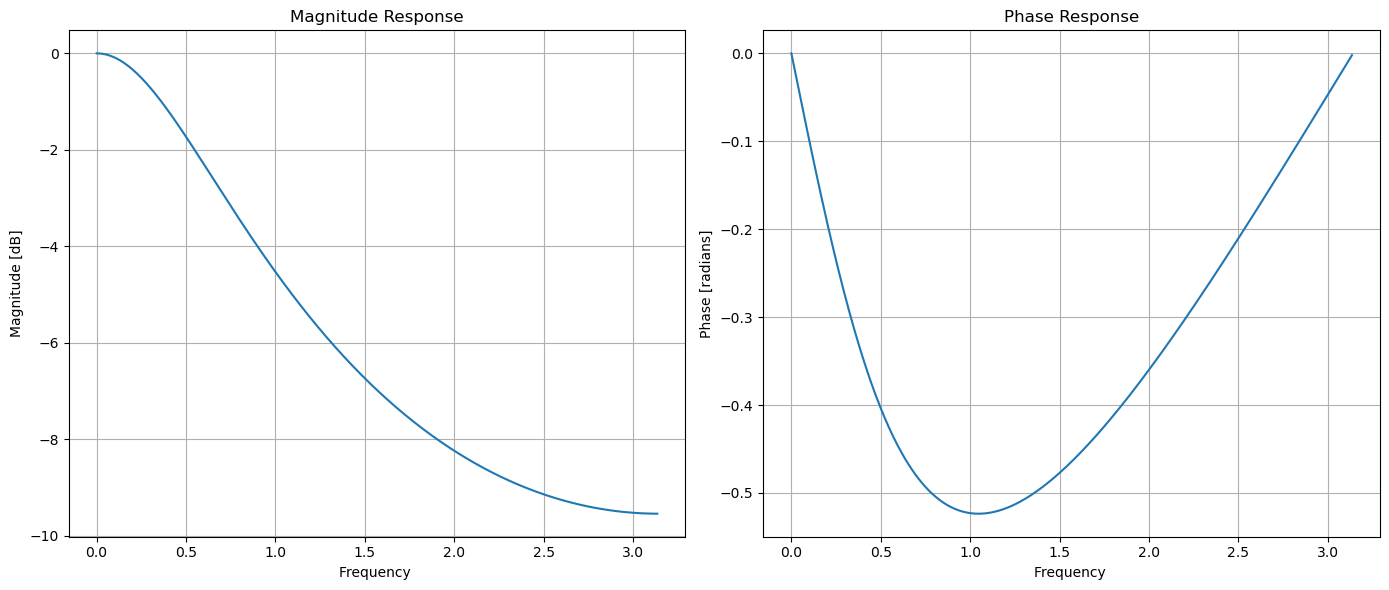

In [38]:
# Plot the magnitude and phase response
plt.figure(figsize=(14, 6))

# Plot magnitude response
plt.subplot(1, 2, 1)
plt.title("Magnitude Response")
plt.xlabel("Frequency ")
plt.ylabel("Magnitude [dB]")
plt.plot(w, 20 * np.log10(abs(h)))
plt.grid()

# Plot phase response
plt.subplot(1, 2, 2)
plt.title("Phase Response")
plt.xlabel("Frequency")
plt.ylabel("Phase [radians]")
plt.plot(w, np.angle(h))
plt.grid()

plt.tight_layout()
plt.show()


# Implementation of the delay effect

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


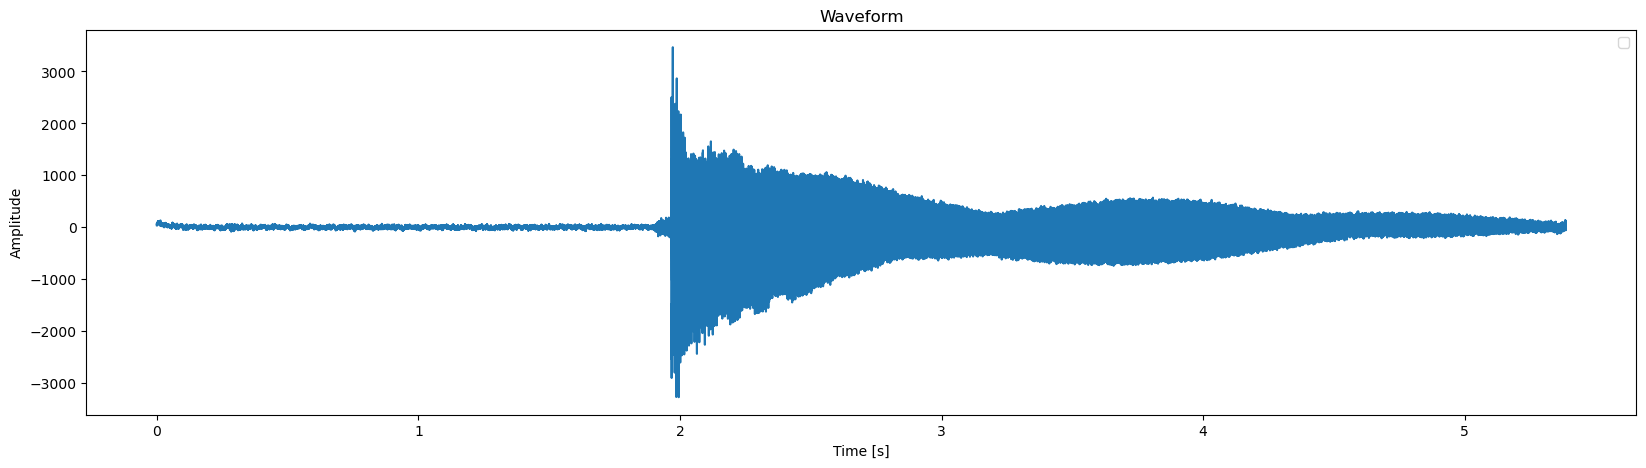

In [39]:

#plotting the waveform of the signal
plot_waveform(data, fs, Time, nsamples)

# Applying the filter

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


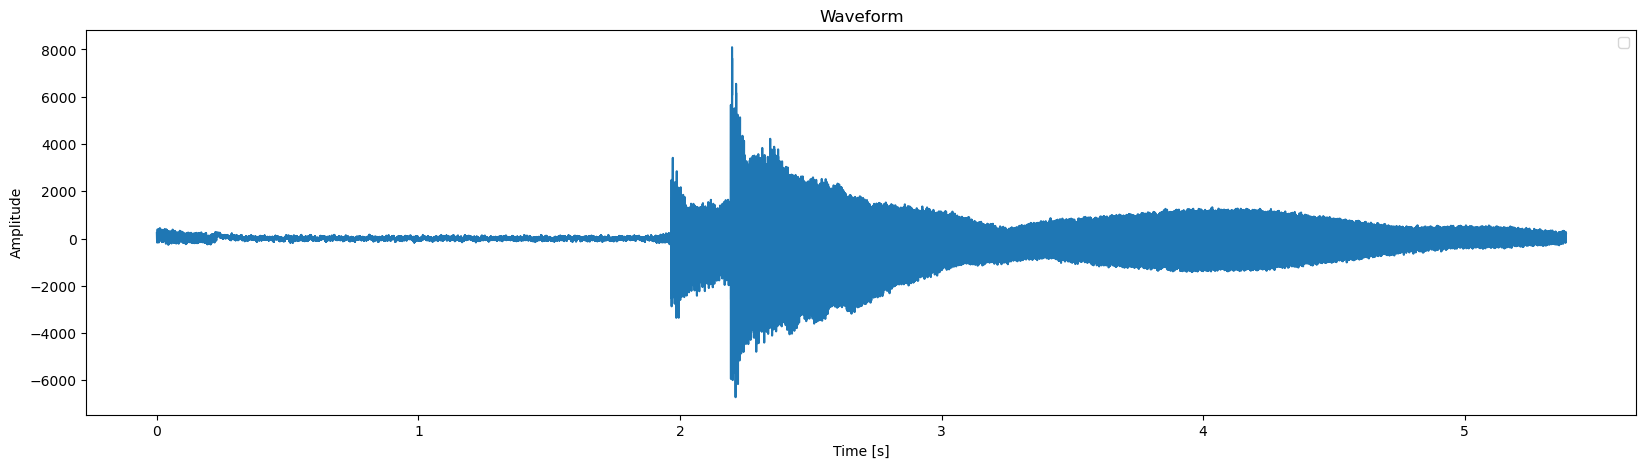

In [40]:
output = np.zeros(data.shape)
alpha = 2
D = 10000
for t in range(len(data)):
    output[t] = data[t] + alpha * data[t-D]

#plotting the waveform of the signal with delay

plot_waveform(output, fs, Time, nsamples)
    

# Stability

# Parameters

# Comparison with the FIR implementation